In [49]:
import pandas as pd;
import numpy as np;
import util.py_data_analysis_util.data_analysis as da;
import matplotlib.pyplot as plt;
import seaborn as sns;
sns.set();

In [3]:
da.enable_ipythonnb_code_toggle();

Toggle code

In [4]:
dataset = pd.read_csv("user_operations.csv");

In [40]:
## predefined operation types
OP_TYPE_OPEN_UI = 1 
OP_TYPE_IAP_SUCC = 2
OP_TYPE_IAP_ATTEMPT = 3
OP_TYPE_BUY_COIN_ITEM = 4

IGNORE_LIST = {
    "FlashGameTopMenu_t#get_items.pop",
    "FlashGuide_t#btn_blank",
    "FlashGameTopMenu_t#pop_text_small",
    "FlashGameTopMenu_t#get_items_small",
    "FlashGameItemBagPop#this",
    "FlashGameTopMenu_t#you_got_prize",
    "FlashGameTopMenu_t#pay",
    "FlashGuide_t#fade_in",
    "FlashGuide_t#fade_out",
};

UI_DESCRIPTION = {
    "FlashShopMain_t#shop_all":"商店主页",
    "FlashMarchPreparation_t#march_reinforce":"出征界面",
    "FlashMarchPreparationPop_t#choose_hero":"出征界面选择英雄弹窗",
    "FlashRecommendedPackage_t#recommended_package":"推荐礼包",
    "FlashGameUIHero#hero_main":"英雄列表",
    "FlashGameMail_t#interface_mails":"邮件首页",
    "FlashChattingMenu_t#chat":"聊天",
    "FlashGameMail_t#menu_2":"邮件2级列表",
    "FlashBuildingUpgrade_t#buildings_upgrade":"建筑升级",
    "FlashBuildingBarrack_t#barracks_train":"造兵/造塔",
    "FlashGameLeagueMain_t#league_main":"联盟主页",
    "FlashGameItemBag#items":"背包",
    "FlashGameUIHero#hero_details":"英雄详情",
    "FlashGameTopMenu_t#not_enough_resources":"资源不足弹窗",
    "FlashWildPop_t#monster_info":"野怪详情",
    "FlashBuildingMenu_t#black_market":"黑市",
    "FlashGameUIEventCenterMenu_t#event_center":"活动中心",
    "FlashFirstRechargeMenu_t#first_recharge":"首冲",
    "FlashFirstRechargeMenu_t#new_server_celebrate":"开服7天乐",
    "FlashBuildingPop_t#speed_up_building":"使用建筑加速道具弹窗",
    "FlashBuildingMenu_t#hospital_cure":"医院治疗",
    "FlashGameUILeagueTreasure#alliance_treasures":"联盟宝藏",
    "FlashGameUIHeroPop#upgrade_equipment":"英雄装备升级",
    "FlashGameLadder_t#arena_work":"竞技场",
    "FlashQuestMenu_t#quest_all":"任务",
    "FlashGameUnitEvolvementPop_t#pop_uprage":"士兵强化/解锁弹窗",
    "FlashFortress_t#entrance":"要塞主页",
    "FlashGameGetResource_t#this":"资源购买列表",
    "FlashGameTopMenu_t#refill_energy":"购买体力弹窗",
    "FlashWildPop_t#wreckage":"废墟",
    "FlashScienceResearch_t#sciences":"个人科技主页",
    "FlashScienceResearch_t#millitary_sciences":"个人科技:军事",
    "FlashScienceResearch_t#development_sciences":"个人科技:发展",
    "FlashScienceResearchPop_t#sciences_research":"个人科技详情弹窗",
    "FlashGameInterfacePop_t#city_buff":"BUFF界面",
    "FlashGameMailDetail_t#system_mails2":"系统邮件详情",
    "FlashGameMailDetail_t#monster_hunting":"PVE战报",
    "FlashGameUILeagueGift#league_gift":"联盟礼物",
    "FlashGameUILeagueTechnology#alliance_sciences":"联盟科技",
    "FlashGameMailDetail_t#pvp_report":"PVP战报",
    "FlashBuildingMenu_t#exchange_res":"资源补给站",
    "FlashGameUIHeroPop#evolve":"英雄进化",
    "FlashGameUIHeroPop#star_up":"英雄升星",
    "FlashBuildingMenu_t#quiz":"小测验",
    "FlashGuide_t#guide_dialog":"引导对话",
    "FlashLeagueBattle_t#alliance_battle":"联盟战争",
    "FlashGameInterfacePop_t#attack_warnings":"攻击预警",
    "FlashGameUIHeroPop#add_exp":"经验药水",
    "FlashGameMailDetail_t#personal_information":"私聊",
    "FlashGameUILeagueShop#league_store":"联盟商店",
    "FlashLottery#lucky_card":"抽卡",
    "FlashBuildingMenu_t#army_overview":"兵力一览",
    "FlashLordPop_t#setting_langueage":"游戏语言设置",
    "FlashLordInfo_t#settings_main":"设置",
    "FlashGameMailDetail_t#scouting_report":"侦察报告",
    "FlashGameSoulSkill#soul_skills":"魂技",
    "FlashGameTopMenu_t#exchange_gems":"金砖换宝石",
    "FlashBattleReplay_t#this":"战斗录像",
    "FlashGameLeagueManagement_t#league_management":"联盟管理",
    "FlashLeagueMember_t#league_members":"联盟成员",
    "FlashGameInterfacePop_t#off_line_report":"离线报告",
    "FlashGameUnitEvolvement_t#unit_evolvement":"士兵强化首页",
    "FlashShopPop_t#subscription_gold_bricks":"订阅：金砖",
    "FlashShopPop_t#subscription_daily_pack":"订阅：每日礼包",
}

def is_ignored_ui(ui_name):
    return ui_name in IGNORE_LIST;

def get_ui_desc_by_name(ui_name):
    if ui_name in UI_DESCRIPTION:
        return UI_DESCRIPTION[ui_name];
    else:
        return ui_name;

In [45]:
def generate_ui_table(ui_table_array):
    match_table = {}
    for i in ui_table_array:
        args = i.split(":")
        match_table[args[0].strip()] = int(args[1])
        
    return match_table;

def get_ui_name_by_id(ui_table, id):
    for k, v in ui_table.items():
        if v == id:
            return k

def parse_record(record):
    SEQUENCE_PREFIX = "op_seq: "
    UI_TABLE_PREFIX = "ui:\n"
    TOTAL_SPENT_PREFIX = "spent: "
    DATE_PREFIX = "date: "
    USERID_PREFIX = "user_id: "
    
    op_seq_start = record.find(SEQUENCE_PREFIX)
    
    if op_seq_start == -1:
        return
    op_seq_start += len(SEQUENCE_PREFIX)
    
    ui_table_start = record.find(UI_TABLE_PREFIX)
    
    if ui_table_start == -1:
        return
    
    spent_start = record.find(TOTAL_SPENT_PREFIX)
    date_start = record.find(DATE_PREFIX)
    userid_start = record.find(USERID_PREFIX)
    
    if spent_start == -1:
        return
    
    if date_start == -1:
        return
    
    if userid_start == -1:
        return
    
    op_seq_array = record[op_seq_start:ui_table_start].strip("\n")[:-1].split("#")
    ui_table_start += len(UI_TABLE_PREFIX)
    ui_table_array = record[ui_table_start:spent_start].splitlines()
    total_spent = int(record[spent_start:date_start].strip("\n").split(":")[1])
    date = record[date_start:userid_start].strip("\n").split(":")[1]
    user_id = record[userid_start:-1].strip("\n").split(":")[1]
    
    ui_table = generate_ui_table(ui_table_array)
    
    new_op_array = []
    
    ui_num = 0;
    for i in op_seq_array:
        op_args = i.split(":")
        op_type = int(op_args[0])
        if op_type == OP_TYPE_OPEN_UI:
            ui_id = int(op_args[1])
            ui_name = get_ui_name_by_id(ui_table, ui_id)
            if not is_ignored_ui(ui_name):
                new_op_array.append(str(OP_TYPE_OPEN_UI) + ":" + ui_name);
                ui_num += 1;
                
        else:
            new_op_array.append(i);
    
    return pd.DataFrame(data = {
        "user_id":[user_id],
        "date":[date], 
        "spent":[total_spent], 
        "ops":[new_op_array],
        "ui_num":[ui_num],
    })
    

In [46]:
parsed_data = pd.DataFrame(data = {
    "user_id":[],
    "date":[], 
    "spent":[], 
    "ops":[]
});

def parse_origin_data(content):
    global parsed_data;
    parsed_data = parsed_data.append(parse_record(content), ignore_index = True);

dataset.loc[:,"content"].apply(lambda x: parse_origin_data(x));

C:\Users\daniel\Anaconda3\lib\site-packages\pandas\core\frame.py:6701: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [87]:
parsed_data.loc[parsed_data["ui_num"] < 100, "ui_num"].count()

1412

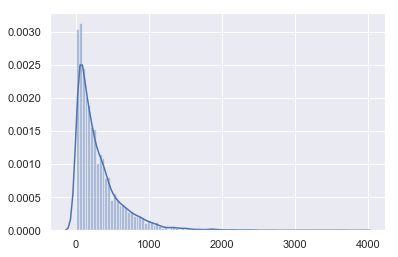

In [86]:
b = np.array(parsed_data["ui_num"])
sns.distplot(b, bins = 100)

1. 每天ui打开次数，最多，最少，分布
2. 礼包推荐弹窗打开次数，购买次数。从推荐弹窗购买礼包次数占百分比
3. 是否能预测iap
4. 是否需要添加玩家总消费
5. 预测下一个打开的界面

In [11]:
total_ui_times = 0;
promotion_ui_times = 0;
def calc_promotion_ui(ops):
    global total_ui_times;
    global promotion_ui_times;
    for i in ops:
        args = i.split(":");
        op_type = int(args[0]);
        if op_type == OP_TYPE_OPEN_UI:
            total_ui_times += 1
            if args[1] == "FlashRecommendedPackage_t#recommended_package":
                promotion_ui_times += 1;
                
parsed_data["ops"].apply(lambda x: calc_promotion_ui(x));            

1442997 41886


In [43]:
prev_ui_list = {}
def buy_item_from_promotion(ops):
    pre_ui = None;
    global prev_ui_list;
    for i in ops:
        args = i.split(":");
        op_type = int(args[0])
        if op_type == OP_TYPE_BUY_COIN_ITEM:
            if pre_ui is not None:
                if pre_ui not in prev_ui_list:
                    prev_ui_list[pre_ui] = 0
                prev_ui_list[pre_ui] += 1;
                #if pre_ui == "FlashShopMain_t#shop_all":
                    #return True
        elif op_type == OP_TYPE_OPEN_UI:
            pre_ui = args[1];
    
    return False;

parsed_data.loc[parsed_data["ops"].apply(lambda x: buy_item_from_promotion(x))];

print(prev_ui_list)

{'FlashShopMain_t#shop_all': 296, 'FlashBuildingMenu_t#black_market': 348, 'FlashRecommendedPackage_t#recommended_package': 80, 'FlashShopPop_t#subscription_daily_pack': 6, 'FlashGameTopMenu_t#pack_content': 40, 'FlashShopPop_t#subscription_gold_bricks': 10, 'FlashGameTopMenu_t#exchange_gems': 3, 'FlashGameGetResource_t#this': 2}


In [44]:
80/41886

0.0019099460440242563

In [16]:
iap_pre_list = [];
MAX_UI_NUM = 10;
def attemp_to_iap(ops):
    pre_uis = [];
    global iap_pre_list;
    for i in ops:
        args = i.split(":")
        op_type = int(args[0])
        if op_type == OP_TYPE_IAP_ATTEMPT:
            iap_pre_list.append(pre_uis);
            pre_uis = [];
        elif op_type == OP_TYPE_OPEN_UI:
            if len(pre_uis) >= MAX_UI_NUM:
                pre_uis.pop(0);
            pre_uis.append(args[1]);
        elif op_type == OP_TYPE_BUY_COIN_ITEM:
            if len(pre_uis) >= MAX_UI_NUM:
                pre_uis.pop(0);
            pre_uis.append("BUY_COIN_ITEM");
    
    return False;

parsed_data.loc[parsed_data["ops"].apply(lambda x: attemp_to_iap(x))];


In [42]:
for i in iap_pre_list:
    print("**********************")
    seq = ""
    for ui_name in i:
        ui_desc = get_ui_desc_by_name(ui_name);
        seq += ("[" + ui_desc + "]->")
        
    print(seq)

**********************
[联盟主页]->[联盟宝藏]->[联盟宝藏]->[任务]->[野怪详情]->[商店主页]->[推荐礼包]->[推荐礼包]->[聊天]->[商店主页]->
**********************
[FlashWildPop_t#marching_troop]->[聊天]->[野怪详情]->[出征界面]->[野怪详情]->[出征界面]->[野怪详情]->[购买体力弹窗]->[资源不足弹窗]->[商店主页]->
**********************
[野怪详情]->[出征界面]->[废墟]->[推荐礼包]->[任务]->[FlashLeaguePop_t#pop_reward]->[邮件首页]->[联盟主页]->[联盟礼物]->[商店主页]->
**********************
[推荐礼包]->[邮件首页]->[邮件2级列表]->[废墟]->[推荐礼包]->[小测验]->[联盟主页]->[联盟礼物]->[造兵/造塔]->[商店主页]->
**********************
[FlashBuildingMenu_t#city_overview]->[BUFF界面]->[个人科技主页]->[个人科技:发展]->[个人科技详情弹窗]->[聊天]->[邮件首页]->[聊天]->[黑市]->[商店主页]->
**********************
[英雄升星]->[经验药水]->[英雄列表]->[兵力一览]->[造兵/造塔]->[造兵/造塔]->[造兵/造塔]->[商店主页]->[首冲]->[商店主页]->
**********************
[个人科技详情弹窗]->[个人科技主页]->[个人科技:发展]->[个人科技主页]->[个人科技:军事]->[邮件首页]->[邮件2级列表]->[使用建筑加速道具弹窗]->[商店主页]->[FlashWelfare_t#welfare_all]->
**********************
[士兵强化/解锁弹窗]->[士兵强化/解锁弹窗]->[FlashLordInfo_t#interface_kings_information]->[FlashLeaguePop_t#reinforce]->[个人科技:军事]->[个人科技主页]->[联盟主